In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
#Dataset Load
df = pd.read_csv("Daily-Total-Rainfall.csv")
df.head(10)

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,Bogra,1948,1,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
1,Bogra,1948,2,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,Bogra,1948,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bogra,1948,4,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,18,NaN
4,Bogra,1948,5,0,24,0,0,0,0,0,...,9,7,24,31,14,0,1,8,0,0
5,Bogra,1948,6,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,NaN
6,Bogra,1948,7,1,8,6,5,14,6,0,...,30,2,0,0,15,9,9,16,3,0
7,Bogra,1948,8,41,32,118,31,6,30,10,...,0,0,0,0,2,4,0,0,13,36
8,Bogra,1948,9,3,11,13,1,0,0,11,...,3,0,1,1,0,0,42,9,12,NaN
9,Bogra,1948,10,12,5,169,36,0,0,0,...,18,0,0,0,0,0,0,0,0,0


<h3>Data Cleaning<h3>

In [210]:
# Replace '***' with 0
df.replace('***',0, inplace=True)
df.replace('*** *',0, inplace=True)
df.replace('*',0, inplace=True)
df.replace('**',0, inplace=True)
# Replace NaN values with 0
df.fillna(0, inplace=True)

# Verify if missing and NaN values are handled
missing_summary = df.isnull().sum()

df.head(10)

,Station,Year,Month,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,Bogra,1948,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bogra,1948,2,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bogra,1948,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bogra,1948,4,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,18,0
4,Bogra,1948,5,0,24,0,0,0,0,0,...,9,7,24,31,14,0,1,8,0,0
5,Bogra,1948,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Bogra,1948,7,1,8,6,5,14,6,0,...,30,2,0,0,15,9,9,16,3,0
7,Bogra,1948,8,41,32,118,31,6,30,10,...,0,0,0,0,2,4,0,0,13,36
8,Bogra,1948,9,3,11,13,1,0,0,11,...,3,0,1,1,0,0,42,9,12,0
9,Bogra,1948,10,12,5,169,36,0,0,0,...,18,0,0,0,0,0,0,0,0,0


In [211]:
df_path = 'Modified-Rainfall.csv'
df.to_csv(df_data_path, index=False)

<h3>Data Transformation<h3>

<h4>Creating Daily Rainfall data<h4>

In [214]:
# Data Transformation for Daily Dataset
daily_data = df.melt(
    id_vars=['Station', 'Year', 'Month'], 
    var_name='Day', 
    value_name='Rainfall'
)
# Ensure Day is sorted numerically and sequentially
daily_data['Day'] = daily_data['Day'].astype(int)
daily_data = daily_data.sort_values(by=['Year','Station', 'Month', 'Day']).reset_index(drop=True)


In [215]:
daily_data.head(10)

,Station,Year,Month,Day,Rainfall
0,Bogra,1948,1,1,0
1,Bogra,1948,1,2,0
2,Bogra,1948,1,3,0
3,Bogra,1948,1,4,0
4,Bogra,1948,1,5,0
5,Bogra,1948,1,6,0
6,Bogra,1948,1,7,0
7,Bogra,1948,1,8,0
8,Bogra,1948,1,9,0
9,Bogra,1948,1,10,0


In [224]:
#command to save as csv file in my PC
#daily_data_path = 'Daily-Transformed-Rainfall.csv'
#daily_data.to_csv(daily_data_path, index=False)

<h4>Creating Monthly Rainfall data</h4>

In [229]:
# Ensure required columns are present
required_columns = ['Station', 'Year', 'Month']
if not all(column in df.columns for column in required_columns):
    raise ValueError(f"The dataset must contain the following columns: {', '.join(required_columns)}")

# Identify columns with day numbers
day_columns = [col for col in df.columns if col.isdigit()]

# Convert day columns to numeric, coercing errors (non-numeric values will be set to NaN)
df[day_columns] = df[day_columns].apply(pd.to_numeric, errors='coerce')

# Sum daily rainfall values to calculate total monthly rainfall
df['Rainfall'] = df[day_columns].sum(axis=1)

# Convert the Rainfall column to integer
df['Rainfall'] = df['Rainfall'].astype(int)

# Select required columns for the new dataset
monthly_data = df[['Station', 'Year', 'Month', 'Rainfall']]

# Sort the dataset by Year, Station, and Month
monthly_data = monthly_data.sort_values(by=['Year', 'Station', 'Month'])

# Save the resulting dataset to a new CSV file
#monthly_data.to_csv('/mnt/data/Monthly-Rainfall.csv', index=False)

#print("Monthly dataset created and saved as 'Monthly-Rainfall.csv'.")


monthly_data.head(20)

,Station,Year,Month,Rainfall
0,Bogra,1948,1,0
1,Bogra,1948,2,5
2,Bogra,1948,3,3
3,Bogra,1948,4,110
4,Bogra,1948,5,297
5,Bogra,1948,6,0
6,Bogra,1948,7,271
7,Bogra,1948,8,424
8,Bogra,1948,9,223
9,Bogra,1948,10,304


In [239]:
#Command to save monthly rainfall data as csv file
# Save the resulting dataset to a new CSV file
#monthly_data.to_csv('Monthly-Rainfall.csv', index=False)

<h2>Data Analysis with Visualization</h2>

<h3>1. Average rainfall per year.</h3>

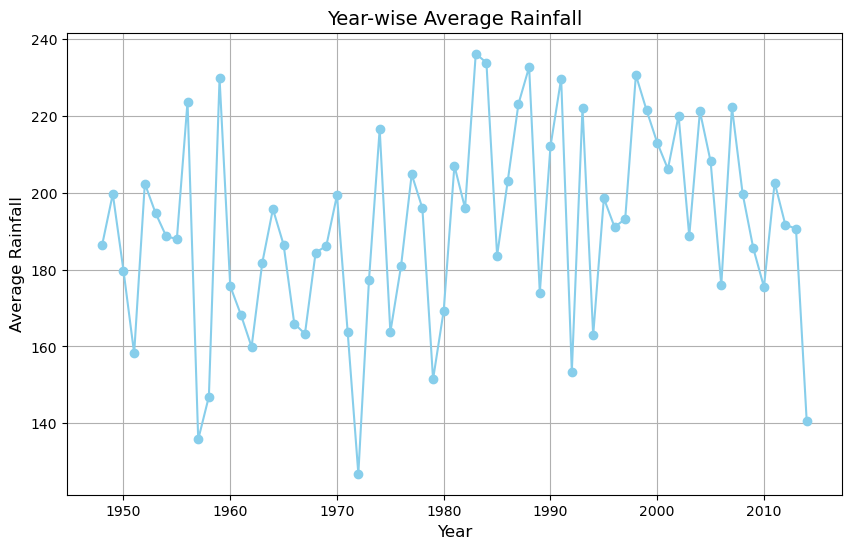

In [251]:
# Calculate Year-wise Average Rainfall
yearly_avg_rainfall = monthly_data.groupby('Year')['Rainfall'].mean().reset_index()
yearly_avg_rainfall.rename(columns={'Rainfall': 'AverageRainfall'}, inplace=True)

# Visualize Year-wise Average Rainfall
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_rainfall['Year'], yearly_avg_rainfall['AverageRainfall'], marker='o', linestyle='-', color='skyblue')
plt.title('Year-wise Average Rainfall', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall', fontsize=12)
plt.grid(True)
plt.show()

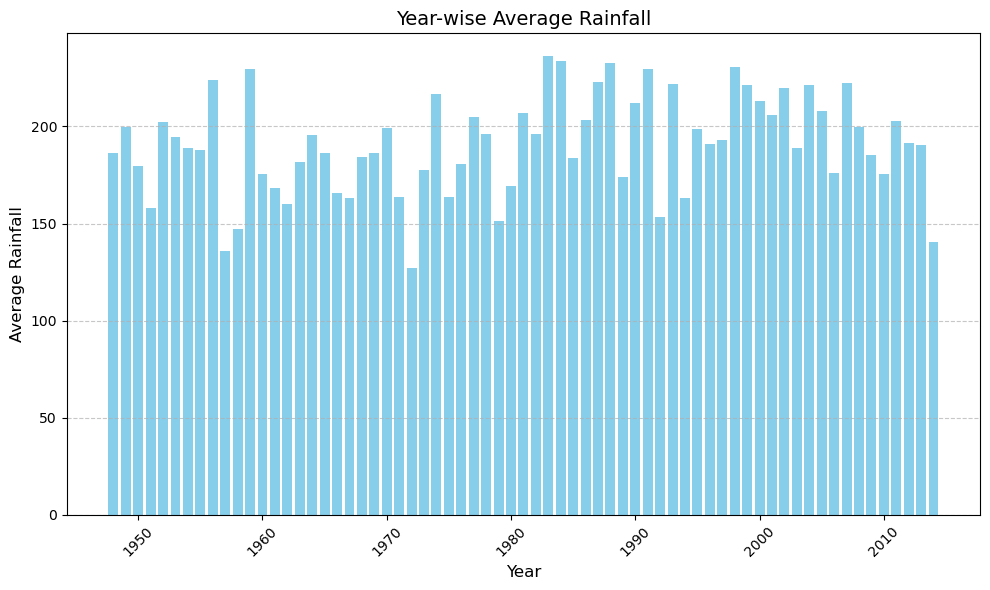

In [288]:
# Visualize Year-wise Average Rainfall as a Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_rainfall['Year'], yearly_avg_rainfall['AverageRainfall'], color='skyblue')
plt.title('Year-wise Average Rainfall', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [255]:
#yearly_avg_rainfall.head(30)

<h3>2. Monthly Average Rainfall: Aggregate rainfall data across all years to compute and visualize monthly trends.</h3>

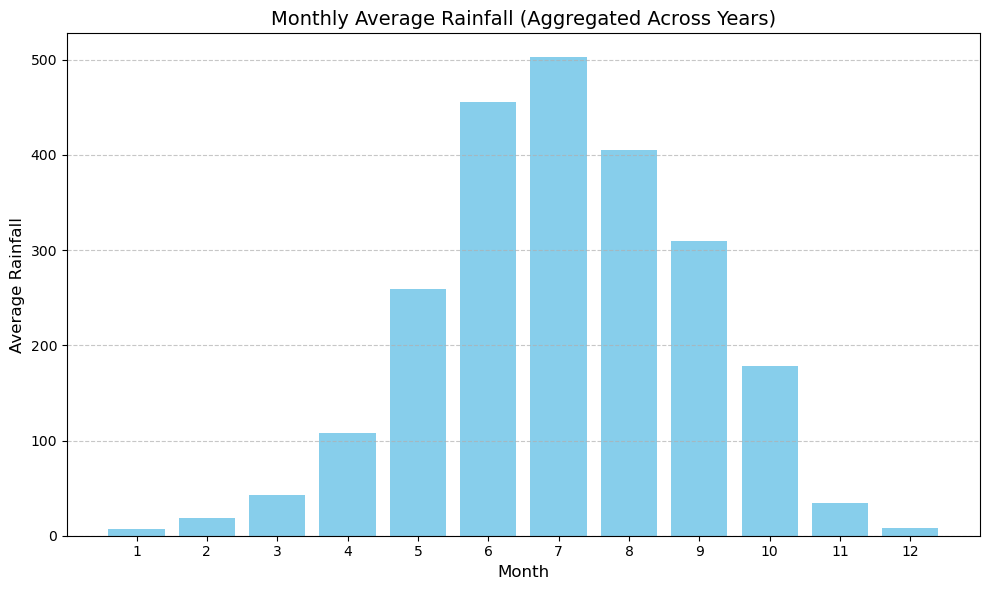

In [259]:
# Calculate Monthly Average Rainfall across all years
monthly_avg_rainfall = monthly_data.groupby('Month')['Rainfall'].mean().reset_index()
monthly_avg_rainfall.rename(columns={'Rainfall': 'AverageRainfall'}, inplace=True)

# Visualize Monthly Average Rainfall as a Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_rainfall['Month'], monthly_avg_rainfall['AverageRainfall'], color='skyblue')
plt.title('Monthly Average Rainfall (Aggregated Across Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xticks(monthly_avg_rainfall['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [282]:
#monthly_avg_rainfall.head(30)

<h3>3. Comparison of Rainfall Trends Across Stations: Compare average rainfall across different stations.</h3>

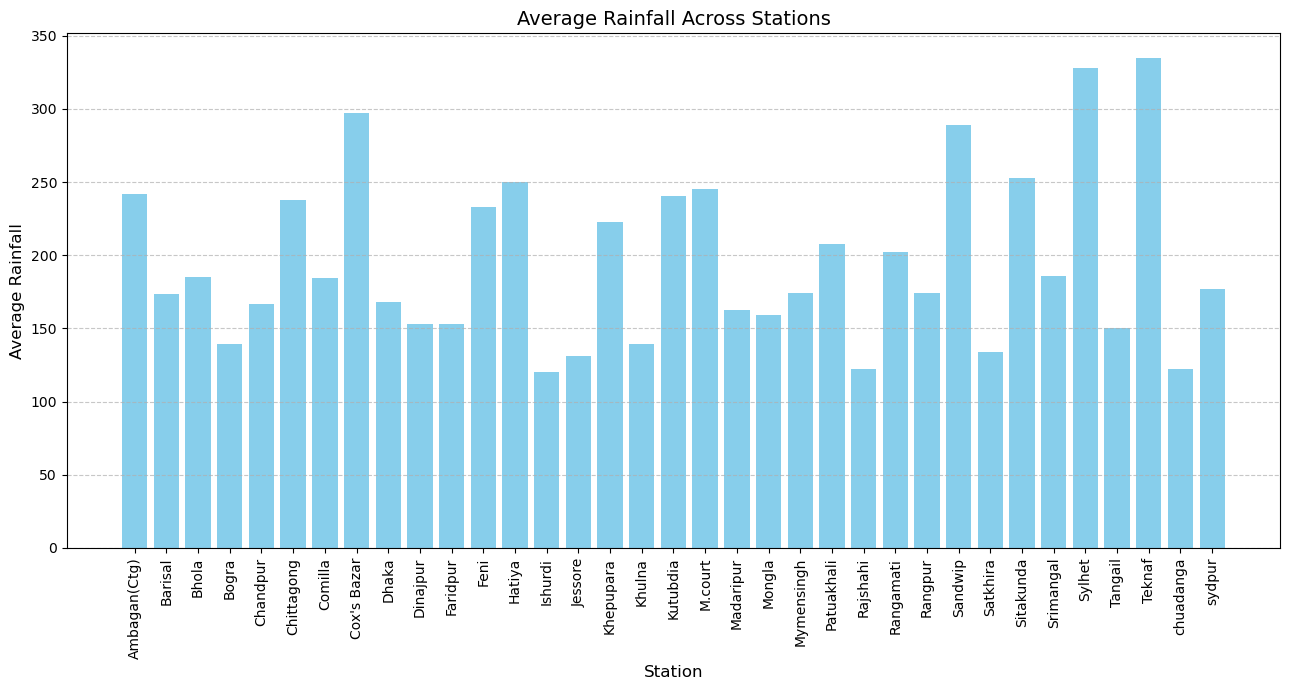

In [276]:
# Calculate Average Rainfall Across Stations
station_avg_rainfall = monthly_data.groupby('Station')['Rainfall'].mean().reset_index()
station_avg_rainfall.rename(columns={'Rainfall': 'AverageRainfall'}, inplace=True)

# Visualize Average Rainfall Across Stations
plt.figure(figsize=(13, 7))
plt.bar(station_avg_rainfall['Station'], station_avg_rainfall['AverageRainfall'], color='skyblue')
plt.title('Average Rainfall Across Stations', fontsize=14)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [280]:
#station_avg_rainfall.head(40)

<h3>4. Seasonal Trend Analysis:Analyze rainfall patterns across seasons</h3>
<h4>Pre-monsoon (March - May), Monsoon (June - October), Post-monsoon(November - February)</h4>

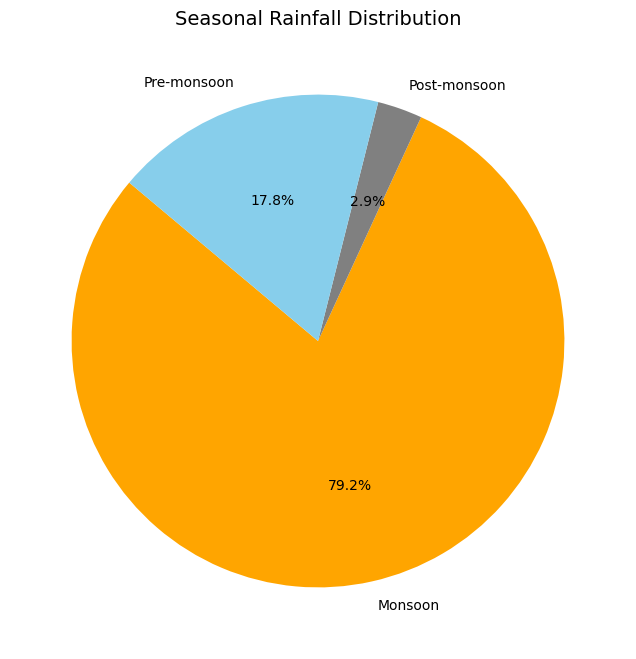

In [302]:
# Seasonal Trend Analysis
monthly_data['Season'] = monthly_data['Month'].apply(
    lambda x: 'Pre-monsoon' if 3 <= x <= 5 else ('Monsoon' if 6 <= x <= 10 else 'Post-monsoon')
)

# Calculate total rainfall for each season
seasonal_rainfall = monthly_data.groupby('Season')['Rainfall'].sum().reset_index()

# Visualize Seasonal Rainfall as a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(seasonal_rainfall['Rainfall'], labels=seasonal_rainfall['Season'], autopct='%1.1f%%', colors=['Orange', 'grey', 'skyblue'], startangle=140)
plt.title('Seasonal Rainfall Distribution', fontsize=14)
plt.show()

<h1>Analysis for a specific city 'DHAKA'</h1>
<h3>1. Analyze the total yearly rainfall for the city Dhaka to identify long-term trends</h3>

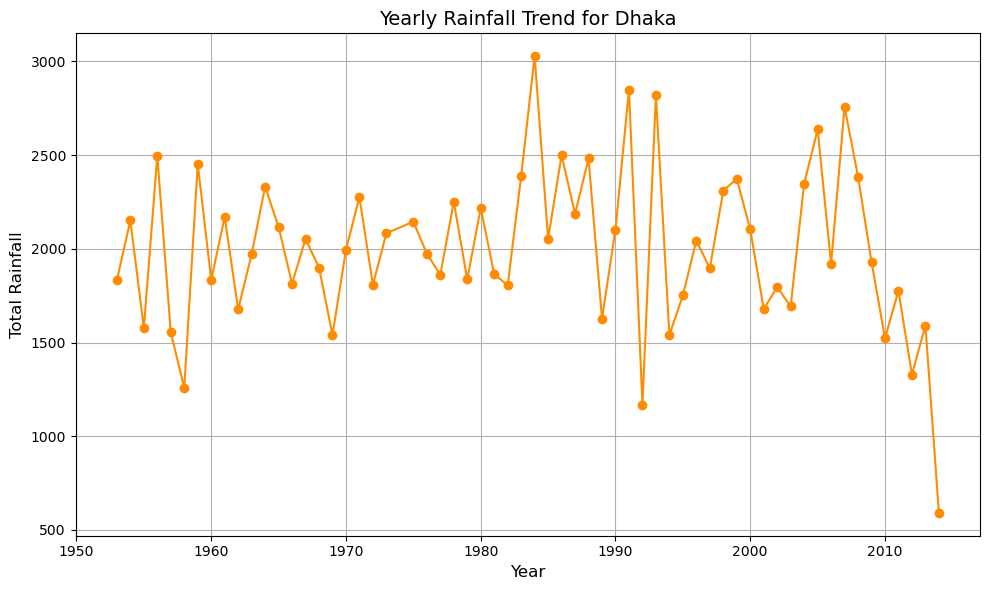

In [318]:
# Analyze Total Yearly Rainfall for Dhaka
city_data = monthly_data[monthly_data['Station'] == 'Dhaka']

yearly_rainfall_dhaka = city_data.groupby('Year')['Rainfall'].sum().reset_index()

# Visualize Yearly Rainfall Trend for Dhaka
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall_dhaka['Year'], yearly_rainfall_dhaka['Rainfall'], marker='o', linestyle='-', color='darkorange')
plt.title('Yearly Rainfall Trend for Dhaka', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


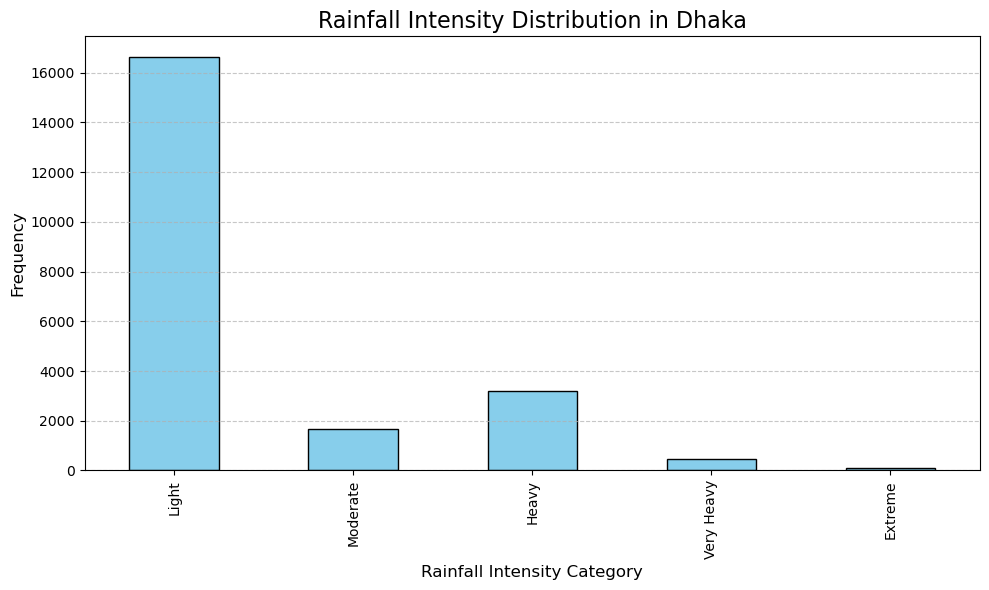

In [340]:
# Clean up the Rainfall column and handle invalid dates
#daily_data['Rainfall'] = pd.to_numeric(daily_data['Rainfall'], errors='coerce')
#daily_data['Date'] = pd.to_datetime(daily_data[['Year', 'Month', 'Day']], errors='coerce')
#daily_data = daily_data.dropna(subset=['Date', 'Rainfall'])

# Copy the dataframe for processing
data_copy = daily_data.copy()

# Filter data for the specified city (e.g., Dhaka)
city = "Dhaka"
city_data = daily_data.loc[daily_data['Station'] == city].copy()

# Categorize rainfall intensity
bins = [0, 2.5, 7.6, 50, 100, float('inf')]
labels = ['Light', 'Moderate', 'Heavy', 'Very Heavy', 'Extreme']
city_data['Intensity'] = pd.cut(city_data['Rainfall'], bins=bins, labels=labels, right=False)

# Calculate the frequency of each intensity category
intensity_counts = city_data['Intensity'].value_counts().sort_index()

# Plot the rainfall intensity distribution
plt.figure(figsize=(10, 6))
intensity_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title(f'Rainfall Intensity Distribution in {city}', fontsize=16)
plt.xlabel('Rainfall Intensity Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

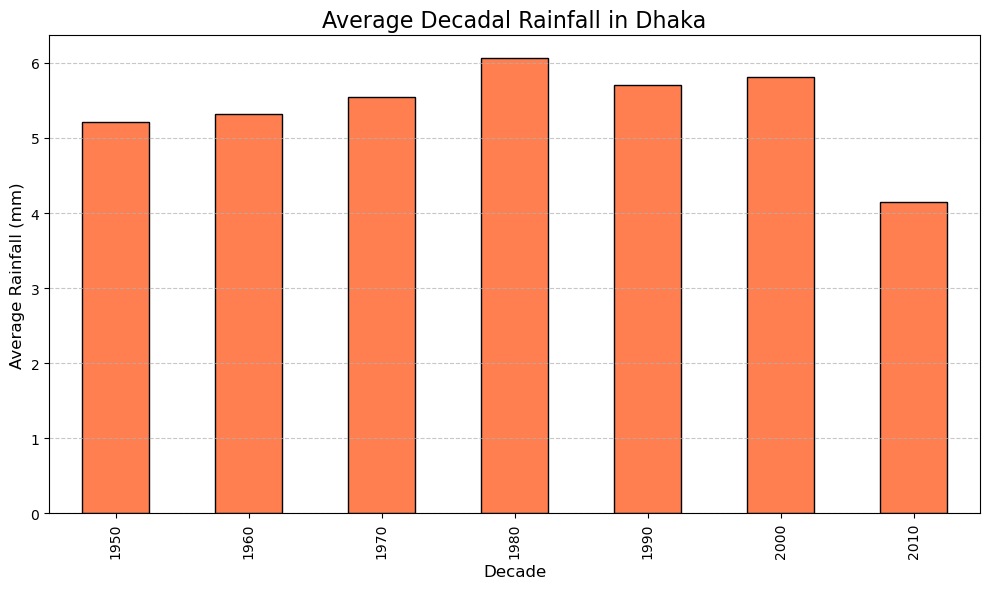

In [338]:
# Compare average rainfall by decade
daily_data['Year'] = daily_data['Date'].dt.year
city_data['Decade'] = (city_data['Year'] // 10) * 10
decadal_rainfall = city_data.groupby('Decade')['Rainfall'].mean()

# Plot decadal average rainfall
plt.figure(figsize=(10, 6))
decadal_rainfall.plot(kind='bar', color='coral', edgecolor='black')

# Add labels and title
plt.title(f'Average Decadal Rainfall in {city}', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


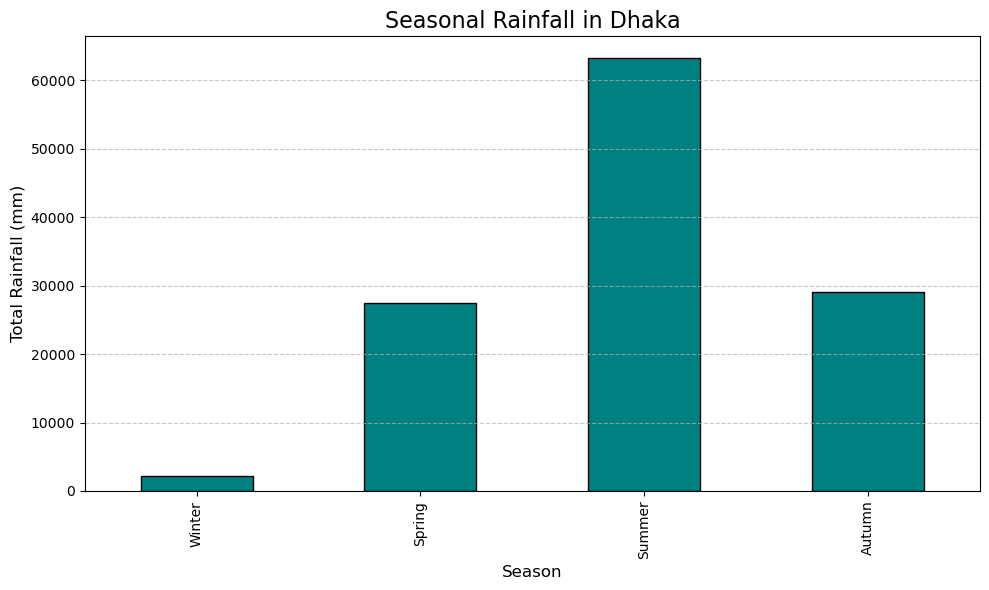

In [336]:
# Clean up the Rainfall column and handle invalid dates
daily_data['Rainfall'] = pd.to_numeric(daily_data['Rainfall'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data[['Year', 'Month', 'Day']], errors='coerce')
daily_data = daily_data.dropna(subset=['Date', 'Rainfall'])

# Filter data for the specified city (e.g., Dhaka)
city = "Dhaka"
city_data = daily_data.loc[daily_data['Station'] == city].copy()

# Define seasons
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
city_data['Season'] = city_data['Date'].dt.month.map(season_mapping)

# Calculate total rainfall for each season
seasonal_rainfall = city_data.groupby('Season')['Rainfall'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot seasonal rainfall totals
plt.figure(figsize=(10, 6))
seasonal_rainfall.plot(kind='bar', color='teal', edgecolor='black')

# Add labels and title
plt.title(f'Seasonal Rainfall in {city}', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h1>Map</h1>
<h3>Total Rainfall in 2013</h3>

In [386]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [411]:
import pandas as pd
import folium
from IPython.display import display

# Load the data
data = pd.read_csv('Monthly-Rainfall.csv')

# Filter data for the year 2013
data_2013 = data[data['Year'] == 2013]

# Calculate total rainfall per station for 2013
total_rainfall_2013 = data_2013.groupby('Station', as_index=False)['Rainfall'].sum()

# Add latitude and longitude for each station based on the provided table
station_coordinates = {
    'Dhaka': {'lat': 23.7, 'lon': 90.4},
    'Sylhet': {'lat': 24.9, 'lon': 91.8},
    'Mymensingh': {'lat': 24.7, 'lon': 90.4},
    'Faridpur': {'lat': 23.6, 'lon': 89.6},
    'Khulna': {'lat': 22.9, 'lon': 89.6},
    'Chittagong': {'lat': 22.3, 'lon': 91.8},
    "Cox's Bazar": {'lat': 21.4, 'lon': 92.0},
    'Jessore': {'lat': 23.2, 'lon': 89.2},
    'Satkhira': {'lat': 22.7, 'lon': 89.1},
    'Barisal': {'lat': 22.7, 'lon': 90.3},
    'Bogra': {'lat': 24.8, 'lon': 89.4},
    'Rangpur': {'lat': 25.8, 'lon': 89.3},
    'Dinajpur': {'lat': 26.1, 'lon': 89.1},
    'Rajshahi': {'lat': 24.4, 'lon': 88.6},
    'Tangail': {'lat': 24.3, 'lon': 89.9},
    'Ishurdi': {'lat': 24.1, 'lon': 89.1},
    'Comilla': {'lat': 23.5, 'lon': 91.2},
    'Feni': {'lat': 23.0, 'lon': 91.4},
    'Patuakhali': {'lat': 23.4, 'lon': 90.3},
    'Chuadanga': {'lat': 23.6, 'lon': 88.9},
    'Mungla': {'lat': 22.6, 'lon': 89.5},
    'Chandpur': {'lat': 23.2, 'lon': 90.7},
    'Sandwip': {'lat': 22.5, 'lon': 91.4},
    'Bhola': {'lat': 22.6, 'lon': 91.4},
    'Teknaf': {'lat': 20.8, 'lon': 92.2},
    'Sydpur': {'lat': 24.9, 'lon': 88.9}
}

# Merge the total rainfall with coordinates
total_rainfall_2013['Latitude'] = total_rainfall_2013['Station'].map(lambda x: station_coordinates.get(x, {}).get('lat', None))
total_rainfall_2013['Longitude'] = total_rainfall_2013['Station'].map(lambda x: station_coordinates.get(x, {}).get('lon', None))

# Filter out stations without coordinates
total_rainfall_2013 = total_rainfall_2013.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered around Bangladesh
bangladesh_map = folium.Map(location=[23.685, 90.356], zoom_start=7)

# Add stations to the map
for _, row in total_rainfall_2013.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station']}: {row['Rainfall']:.2f} mm",
        icon=folium.Icon(icon="cloud", color="blue")
    ).add_to(bangladesh_map)

# Display the map in the Jupyter Notebook
bangladesh_map



In [409]:
import pandas as pd
import folium
from IPython.display import display

# Load the data
data = pd.read_csv('Monthly-Rainfall.csv')

# Filter data for the year 2013
data_2013 = data[data['Year'] == 2013]

# Calculate total rainfall per station for 2013
total_rainfall_2013 = data_2013.groupby('Station', as_index=False)['Rainfall'].sum()

# Add latitude and longitude for each station based on the provided table
station_coordinates = {
    'Dhaka': {'lat': 23.7, 'lon': 90.4},
    'Sylhet': {'lat': 24.9, 'lon': 91.8},
    'Mymensingh': {'lat': 24.7, 'lon': 90.4},
    'Faridpur': {'lat': 23.6, 'lon': 89.6},
    'Khulna': {'lat': 22.9, 'lon': 89.6},
    'Chittagong': {'lat': 22.3, 'lon': 91.8},
    "Cox's Bazar": {'lat': 21.4, 'lon': 92.0},
    'Jessore': {'lat': 23.2, 'lon': 89.2},
    'Satkhira': {'lat': 22.7, 'lon': 89.1},
    'Barisal': {'lat': 22.7, 'lon': 90.3},
    'Bogra': {'lat': 24.8, 'lon': 89.4},
    'Rangpur': {'lat': 25.8, 'lon': 89.3},
    'Dinajpur': {'lat': 26.1, 'lon': 89.1},
    'Rajshahi': {'lat': 24.4, 'lon': 88.6},
    'Tangail': {'lat': 24.3, 'lon': 89.9},
    'Ishurdi': {'lat': 24.1, 'lon': 89.1},
    'Comilla': {'lat': 23.5, 'lon': 91.2},
    'Feni': {'lat': 23.0, 'lon': 91.4},
    'Patuakhali': {'lat': 23.4, 'lon': 90.3},
    'Chuadanga': {'lat': 23.6, 'lon': 88.9},
    'Mungla': {'lat': 22.6, 'lon': 89.5},
    'Chandpur': {'lat': 23.2, 'lon': 90.7},
    'Sandwip': {'lat': 22.5, 'lon': 91.4},
    'Bhola': {'lat': 22.6, 'lon': 91.4},
    'Teknaf': {'lat': 20.8, 'lon': 92.2},
    'Sydpur': {'lat': 24.9, 'lon': 88.9}
}

# Merge the total rainfall with coordinates
total_rainfall_2013['Latitude'] = total_rainfall_2013['Station'].map(lambda x: station_coordinates.get(x, {}).get('lat', None))
total_rainfall_2013['Longitude'] = total_rainfall_2013['Station'].map(lambda x: station_coordinates.get(x, {}).get('lon', None))

# Filter out stations without coordinates
total_rainfall_2013 = total_rainfall_2013.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered around Bangladesh
bangladesh_map = folium.Map(location=[23.685, 90.356], zoom_start=7)

# Add stations to the map
for _, row in total_rainfall_2013.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Rainfall'] / 100,  # Scale the radius based on total rainfall
        popup=f"{row['Station']}: {row['Rainfall']:.2f} mm",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(bangladesh_map)

# Display the map in the Jupyter Notebook
bangladesh_map


In [413]:
import pandas as pd
import folium
from IPython.display import display

# Load the data
data = pd.read_csv('Monthly-Rainfall.csv')

# Filter data for the year 2013
data_2013 = data[data['Year'] == 2013]

# Calculate total rainfall per station for 2013
total_rainfall_2013 = data_2013.groupby('Station', as_index=False)['Rainfall'].sum()

# Add latitude and longitude for each station based on the provided table
station_coordinates = {
    'Dhaka': {'lat': 23.7, 'lon': 90.4},
    'Sylhet': {'lat': 24.9, 'lon': 91.8},
    'Mymensingh': {'lat': 24.7, 'lon': 90.4},
    'Faridpur': {'lat': 23.6, 'lon': 89.6},
    'Khulna': {'lat': 22.9, 'lon': 89.6},
    'Chittagong': {'lat': 22.3, 'lon': 91.8},
    "Cox's Bazar": {'lat': 21.4, 'lon': 92.0},
    'Jessore': {'lat': 23.2, 'lon': 89.2},
    'Satkhira': {'lat': 22.7, 'lon': 89.1},
    'Barisal': {'lat': 22.7, 'lon': 90.3},
    'Bogra': {'lat': 24.8, 'lon': 89.4},
    'Rangpur': {'lat': 25.8, 'lon': 89.3},
    'Dinajpur': {'lat': 26.1, 'lon': 89.1},
    'Rajshahi': {'lat': 24.4, 'lon': 88.6},
    'Tangail': {'lat': 24.3, 'lon': 89.9},
    'Ishurdi': {'lat': 24.1, 'lon': 89.1},
    'Comilla': {'lat': 23.5, 'lon': 91.2},
    'Feni': {'lat': 23.0, 'lon': 91.4},
    'Patuakhali': {'lat': 23.4, 'lon': 90.3},
    'Chuadanga': {'lat': 23.6, 'lon': 88.9},
    'Mungla': {'lat': 22.6, 'lon': 89.5},
    'Chandpur': {'lat': 23.2, 'lon': 90.7},
    'Sandwip': {'lat': 22.5, 'lon': 91.4},
    'Bhola': {'lat': 22.6, 'lon': 91.4},
    'Teknaf': {'lat': 20.8, 'lon': 92.2},
    'Sydpur': {'lat': 24.9, 'lon': 88.9}
}

# Merge the total rainfall with coordinates
total_rainfall_2013['Latitude'] = total_rainfall_2013['Station'].map(lambda x: station_coordinates.get(x, {}).get('lat', None))
total_rainfall_2013['Longitude'] = total_rainfall_2013['Station'].map(lambda x: station_coordinates.get(x, {}).get('lon', None))

# Filter out stations without coordinates
total_rainfall_2013 = total_rainfall_2013.dropna(subset=['Latitude', 'Longitude'])

# Create a map centered around Bangladesh with a different tile layer
bangladesh_map = folium.Map(location=[23.685, 90.356], zoom_start=7, tiles='CartoDB Positron')

# Add stations to the map
for _, row in total_rainfall_2013.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Rainfall'] / 100,  # Scale the radius based on total rainfall
        popup=f"{row['Station']}: {row['Rainfall']:.2f} mm",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(bangladesh_map)

# Display the map in the Jupyter Notebook
bangladesh_map


<h1>ML model</h1>

<h4>Data balanced using ADASYN</h4>

Class Distribution:
RainBinary
0    439415
1    192753
Name: count, dtype: int64
Dataset balanced using ADASYN.
Balanced Class Distribution:
RainBinary
1    452452
0    439415
Name: count, dtype: int64
Cross-Validated ROC AUC Scores: [0.88769953 0.88815695 0.88866482 0.88525097 0.88662652 0.88833152
 0.8877268  0.88551762 0.88908921 0.88602703]
Mean ROC AUC Score: 0.8873090969018053
Random Forest - Accuracy: 0.8249072174195791
Random Forest - F1 Score: 0.8419033156162997
Random Forest - Precision: 0.7768674563730802
Random Forest - ROC AUC Score: 0.8870290125932656


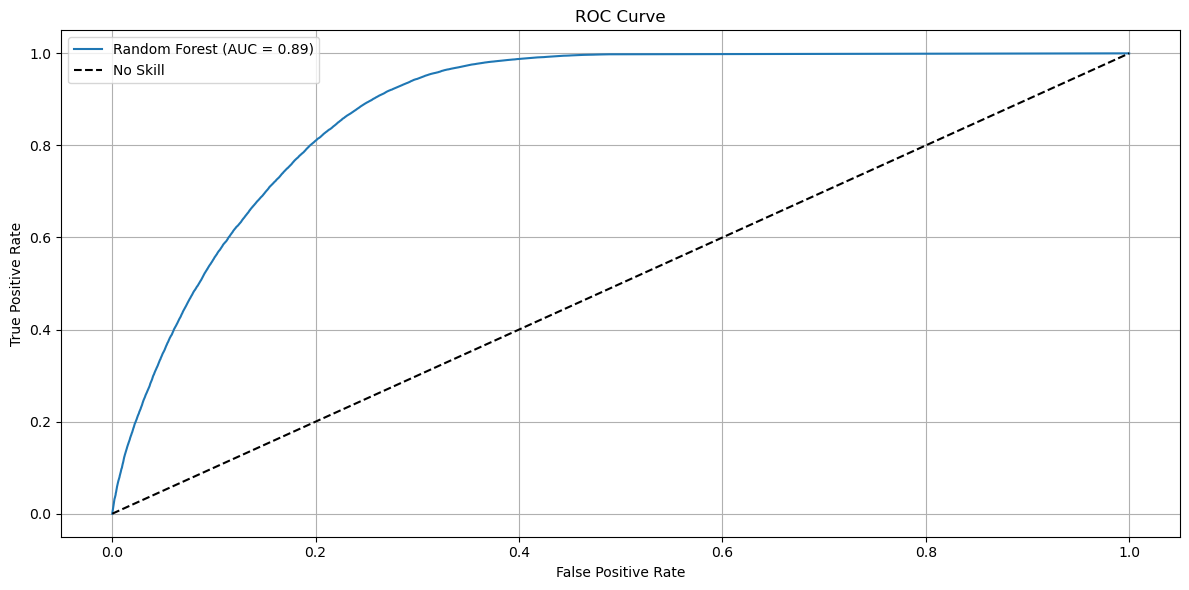

In [9]:
# Load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, roc_curve
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Daily-Rainfall.csv'
daily_data = pd.read_csv(file_path)

# Data Preprocessing
daily_data['Rainfall'] = pd.to_numeric(daily_data['Rainfall'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data[['Year', 'Month', 'Day']], errors='coerce')
daily_data = daily_data.dropna(subset=['Date', 'Rainfall'])

# Feature Engineering
daily_data['Year'] = daily_data['Date'].dt.year
daily_data['Month'] = daily_data['Date'].dt.month
daily_data['Day'] = daily_data['Date'].dt.day

# Convert Rainfall to binary classification (Rain or No Rain)
daily_data['RainBinary'] = (daily_data['Rainfall'] > 0).astype(int)

# Check for class imbalance
class_counts = daily_data['RainBinary'].value_counts()
print("Class Distribution:")
print(class_counts)

# Balance the dataset using ADASYN if necessary
if class_counts.min() / class_counts.max() < 0.5:
    ada = ADASYN(random_state=42)
    X = daily_data[['Year', 'Month', 'Day']]
    y = daily_data['RainBinary']
    X_resampled, y_resampled = ada.fit_resample(X, y)
    balanced_class_counts = pd.Series(y_resampled).value_counts()
    print("Dataset balanced using ADASYN.")
    print("Balanced Class Distribution:")
    print(balanced_class_counts)
else:
    X_resampled, y_resampled = daily_data[['Year', 'Month', 'Day']], daily_data['RainBinary']
    print("Dataset is already balanced.")

# Define K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-Fold Cross Validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='roc_auc')
print("Cross-Validated ROC AUC Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit the model and evaluate
rf_model.fit(X_train, y_train)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - F1 Score:", rf_f1)
print("Random Forest - Precision:", rf_precision)
print("Random Forest - ROC AUC Score:", rf_roc_auc)

# Visualization: ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probabilities)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<h4>Data balanced using RandomOverSampler</h4>

Class Distribution:
RainBinary
0    439415
1    192753
Name: count, dtype: int64
Dataset balanced.
Balanced Class Distribution:
RainBinary
0    439415
1    439415
Name: count, dtype: int64
Cross-Validated ROC AUC Scores: [0.91679409 0.91661442 0.91789296 0.91685696 0.91409851 0.91609181
 0.9170426  0.91499164 0.91758475 0.91567549]
Mean ROC AUC Score: 0.9163643218575525
Random Forest - Accuracy: 0.8412946758758805
Random Forest - F1 Score: 0.8493896216788238
Random Forest - Precision: 0.8077946084724005
Random Forest - ROC AUC Score: 0.916098165101598


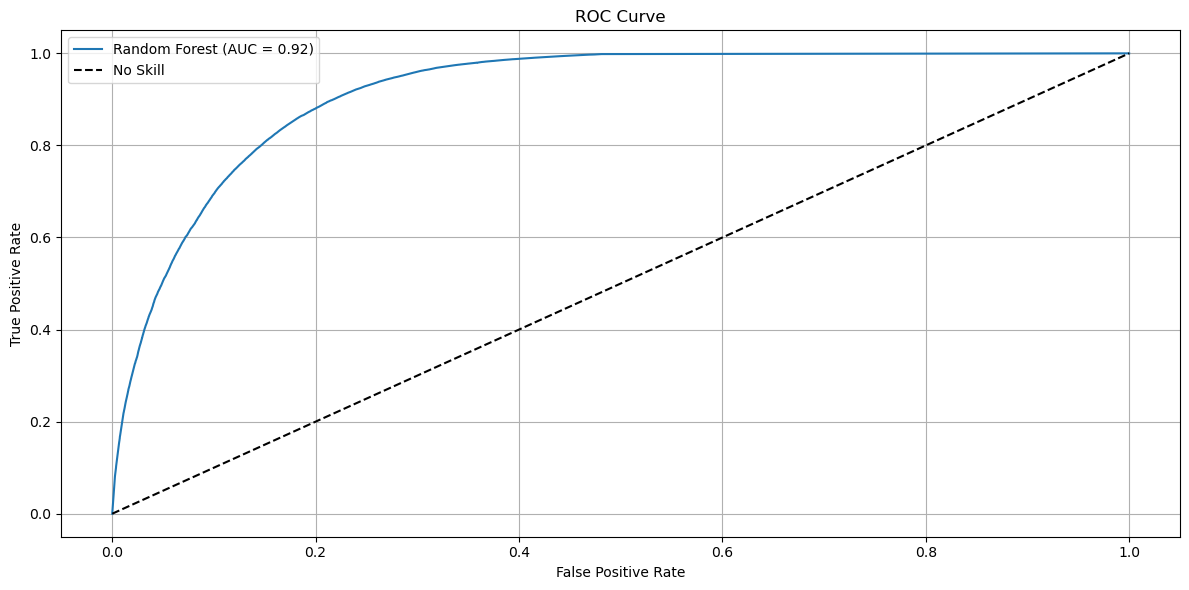

In [14]:
# Load the dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Daily-Rainfall.csv'
daily_data = pd.read_csv(file_path)

# Data Preprocessing
daily_data['Rainfall'] = pd.to_numeric(daily_data['Rainfall'], errors='coerce')
daily_data['Date'] = pd.to_datetime(daily_data[['Year', 'Month', 'Day']], errors='coerce')
daily_data = daily_data.dropna(subset=['Date', 'Rainfall'])

# Feature Engineering
daily_data['Year'] = daily_data['Date'].dt.year
daily_data['Month'] = daily_data['Date'].dt.month
daily_data['Day'] = daily_data['Date'].dt.day

# Convert Rainfall to binary classification (Rain or No Rain)
daily_data['RainBinary'] = (daily_data['Rainfall'] > 0).astype(int)

# Check for class imbalance
class_counts = daily_data['RainBinary'].value_counts()
print("Class Distribution:")
print(class_counts)

# Balance the dataset if necessary
if class_counts.min() / class_counts.max() < 0.5:
    ros = RandomOverSampler(random_state=42)
    X = daily_data[['Year', 'Month', 'Day']]
    y = daily_data['RainBinary']
    X_resampled, y_resampled = ros.fit_resample(X, y)
    balanced_class_counts = pd.Series(y_resampled).value_counts()
    print("Dataset balanced.")
    print("Balanced Class Distribution:")
    print(balanced_class_counts)
else:
    X_resampled, y_resampled = daily_data[['Year', 'Month', 'Day']], daily_data['RainBinary']
    print("Dataset is already balanced.")
   
# Define K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-Fold Cross Validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=kf, scoring='roc_auc')
print("Cross-Validated ROC AUC Scores:", cv_scores)
print("Mean ROC AUC Score:", np.mean(cv_scores))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit the model and evaluate
rf_model.fit(X_train, y_train)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)
print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - F1 Score:", rf_f1)
print("Random Forest - Precision:", rf_precision)
print("Random Forest - ROC AUC Score:", rf_roc_auc)

# Visualization: ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_probabilities)
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()